## Titanic dataset

### Objectives:
1. Load the dataset into python environment
2. Make **`PassengerId`** as the index column
3. Check the basic details of the dataset
4. Fill in all the **`missing values`** present in all the columns in the dataset
5. Check and **`handle outliers`** in at least 3 columns in the dataset
6. Do **`min max scaling`** on the feature set (Take ‘Survived’ as target)

### Importing relevant libraries

In [153]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

#### Setting up for visualization

In [171]:
%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams.update({'figure.figsize': (6, 4), 'figure.dpi': 100})

### 1. Loading the dataset
### 2. Making Passenger-id the index column

In [355]:
df = pd.read_csv('Data/titanic_dataset.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Checking the basic details of the dataset

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [357]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [358]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Insights:
- The dataset contains 11 features and 891 rows
- There are several null values in columns: Age, Cabin, and Embarked

### 4. Handling missing values

#### a) Age

In [359]:
print('\nNumber of null values in age column: ', df['Age'].isnull().sum())


Number of null values in age column:  177


In [360]:
df['Age'].median()

28.0

Trying to fill with median by creating a new feature: `median_age`

In [361]:
df['median_age'] = df['Age'].fillna(df['Age'].median())
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,median_age
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


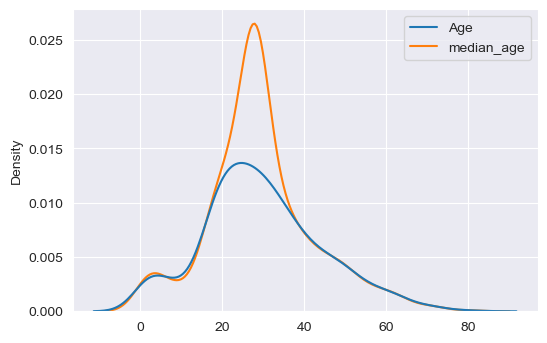

In [362]:
sns.kdeplot(data=df[['Age', 'median_age']])
plt.show()

Filling 177 values with median has significantly distorted the distribution

Trying the `random sample` approach

In [363]:
random_age_values = df['Age'].dropna().sample(df['Age'].isnull().sum())
random_age_values.index = df[df['Age'].isnull()].index
df['random_age'] = df['Age'].fillna(random_age_values)

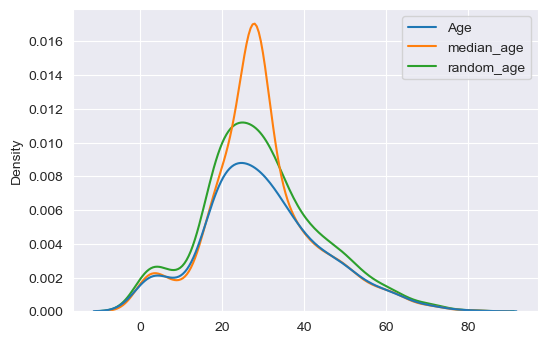

In [364]:
sns.kdeplot(data=df[['Age', 'median_age', 'random_age']])
plt.show()

The random sample method appears to be much more effective

In [365]:
df['Age'].fillna(random_age_values, inplace=True)

In [366]:
df['Age'].isnull().sum()

0

Filling in the missing values using 177 random samples excluding *NAN* values from the 'Age' column

In [367]:
df.drop(columns=['median_age', 'random_age'], inplace=True)

In [368]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### b) Embarked

The `Embarked` column has only 2 null values, which can be filled with mode.

In [369]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [370]:
df['Embarked'].isnull().sum()

0

#### c) Cabin

In [371]:
df['Cabin'].isnull().sum()

687

In [372]:
df['Cabin'].nunique()

147

- More than 77% of the data in Cabin column is missing
- The feature is categorical with high number of unique values
- There is no reliable way to handle such high number of missing values
- The feature doesn't contribute to the machine learning model
- Filling the *NAN* values as N/A 

In [373]:
df['Cabin'].fillna('N/A', inplace=True)

In [374]:
df['Cabin'].isnull().sum()

0

All missing values handled

### 5. Handling Outliers

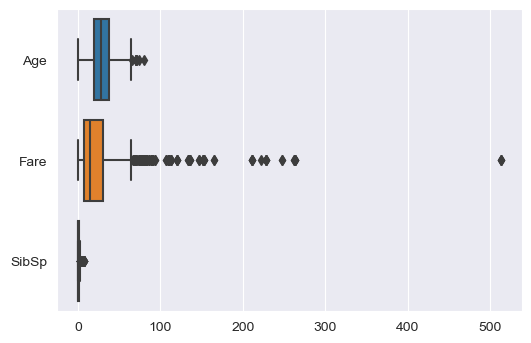

In [375]:
sns.boxplot(data=df[['Age', 'Fare', 'SibSp']], orient='h')
plt.show()

The columns **Fare, SibSp, Age** has ouliers

In [376]:
df_with_outliers = df.copy(deep=True)

Keeping a deep copy of cleaned data intact

Writing a function to handle outliers in these three columns

In [377]:
def outlier_handling(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    q_limit = 1.5 * iqr
    upper_limit = q3 + q_limit
    lower_limt = q1 - q_limit
    outliers = data.loc[(data < lower_limt) ^ (data > upper_limit)].tolist()
    idx = data.loc[(data < lower_limt) ^ (data > upper_limit)].index.tolist()
    return outliers, idx

In [378]:
fare_outlier_list, fare_outlier_index = outlier_handling(df['Fare'])
age_outlier_list, age_outlier_index = outlier_handling(df['Age'])
sibsp_oulliers, sibsp_outlier_index = outlier_handling(df['SibSp'])

In [379]:
index_to_remove = []

In [380]:
for each in fare_outlier_index:
    if (each in age_outlier_index) or (each in sibsp_outlier_index):
        continue
    else:
        index_to_remove.append(each)

Dropping the index in the list index_to_remove

In [381]:
len(index_to_remove)

105

In [382]:
df.drop(index=index_to_remove, inplace=True)

In [383]:
df.shape

(786, 11)

105 outliers removed from the dataframe

#### Machine learning model

In [384]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [385]:
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

In [386]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
6,0,3,male,24.0,0,0,8.4583,Q


Encoding sex column as 0 and 1

In [387]:
labelencoder = preprocessing.LabelEncoder()

In [388]:
df['Sex'] = labelencoder.fit_transform(df['Sex'])

In [389]:
df['Sex'].value_counts()

1    537
0    249
Name: Sex, dtype: int64

Encoding the Embarked column `using one-hot encoding`

In [390]:
df = pd.get_dummies(data=df, columns=['Embarked'])

In [391]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0,0,1
3,1,3,0,26.0,0,0,7.9250,0,0,1
4,1,1,0,35.0,1,0,53.1000,0,0,1
5,0,3,1,35.0,0,0,8.0500,0,0,1
6,0,3,1,24.0,0,0,8.4583,0,1,0


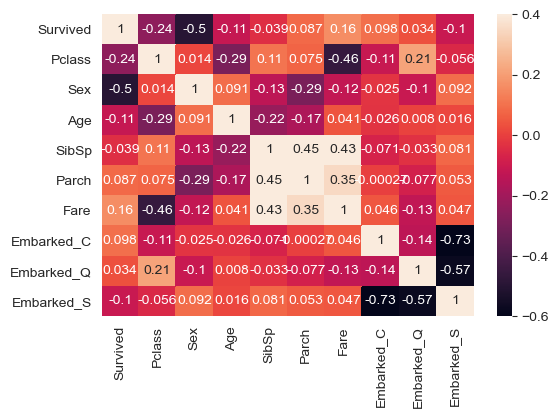

In [392]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, vmax=0.4, vmin=-0.6)
plt.show()

In [393]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [394]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [395]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [396]:
predictions = model.predict(X_test)

In [397]:
mse_value = metrics.mean_squared_error(y_test, predictions)
print('\nThe mean squared error value is: ', mse_value)
r_square_value = metrics.r2_score(y_test, predictions)
print('\nThe r square value is: ', r_square_value)


The mean squared error value is:  0.15994885919622934

The r square value is:  0.3163904603707124


#### Checking the model without removing the outliers

In [398]:
df_with_outliers.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

In [399]:
df_with_outliers['Sex'] = labelencoder.fit_transform(df_with_outliers['Sex'])

In [400]:
df_with_outliers = pd.get_dummies(data=df_with_outliers, columns=['Embarked'])
df_with_outliers.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0,0,1
2,1,1,0,38.0,1,0,71.2833,1,0,0
3,1,3,0,26.0,0,0,7.9250,0,0,1
4,1,1,0,35.0,1,0,53.1000,0,0,1
5,0,3,1,35.0,0,0,8.0500,0,0,1


In [401]:
X = df_with_outliers.drop('Survived', axis=1)
y = df_with_outliers['Survived']

In [402]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [403]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [404]:
predictions = model.predict(X_test)

In [405]:
mse_value = metrics.mean_squared_error(y_test, predictions)
print('\nThe mean squared error value is: ', mse_value)
r_square_value = metrics.r2_score(y_test, predictions)
print('\nThe r square value is: ', r_square_value)


The mean squared error value is:  0.13623653550678336

The r square value is:  0.43820401104596585


#### Conclusion:
- Not removing the outliers seems to be better for the model

### 6. Min-max scaling

In [406]:
min_max = preprocessing.MinMaxScaler(feature_range=(0, 1))
X = min_max.fit_transform(X)

In [407]:
X = pd.DataFrame(X)

In [408]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [409]:
model = lr.fit(X_train, y_train)

In [410]:
predictions_2 = model.predict(X_test)

In [411]:
mse_value = metrics.mean_squared_error(y_test, predictions)
print('\nThe mean squared error value is: ', mse_value)
r_square_value = metrics.r2_score(y_test, predictions)
print('\nThe r square value is: ', r_square_value)


The mean squared error value is:  0.13623653550678336

The r square value is:  0.43820401104596585


#### Insight:
- Min max scaling doesn't seem to have any impact on the model

In [412]:
df_with_outliers.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [413]:
df_with_outliers.drop(columns=['Age', 'SibSp', 'Parch'], axis=1, inplace=True)
df_with_outliers.head()

,Survived,Pclass,Sex,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,
1,0,3,1,7.2500,0,0,1
2,1,1,0,71.2833,1,0,0
3,1,3,0,7.9250,0,0,1
4,1,1,0,53.1000,0,0,1
5,0,3,1,8.0500,0,0,1


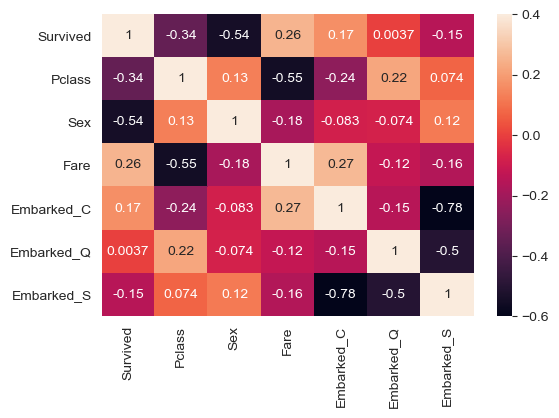

In [414]:
new_corr_matrix = df_with_outliers.corr()
sns.heatmap(new_corr_matrix, annot=True, vmax=0.4, vmin=-0.6)
plt.show()

In [415]:
X = df_with_outliers.drop('Survived', axis=1)
y = df_with_outliers['Survived']

In [416]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [417]:
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)

In [418]:
mse_value = metrics.mean_squared_error(y_test, predictions)
print('\nThe mean squared error value is: ', mse_value)
r_square_value = metrics.r2_score(y_test, predictions)
print('\nThe r square value is: ', r_square_value)


The mean squared error value is:  0.1453685573932806

The r square value is:  0.4005464675111835


Feature reduction isn't good for the dataset either